# Smetric Insights  testing code

In [25]:
import requests
import json
import sys
import pandas as pd
import time
import datetime
from pandaserd import ERD
from urllib.parse import urlencode, unquote
import hmac
import hashlib
import hmac
import base64
from urllib.parse import urlencode, unquote


In [26]:
api_id = 'c4fb1319-bdb7-4c45-9097-2cf3ac5d46ba'
api_key = '5hCLep58jP3phwoCnPvnRrBrXVyILNbB7CttxOwWxVGZg8Eg4Dcv50RkFjYUDyGlrPkRYRmfyMKpT27u5WrMQ=='

In [27]:
def get_url( endpoint):
    url = "https://api.unleashedsoftware.com/"
    queryString = urlencode("")
    return "{0}{1}?{2}".format(url, endpoint, queryString)

def encodeQuery():
    queryStringBytes = unquote(urlencode('')).encode('utf-8')
    hash = hmac.new(api_key.encode('utf-8'), msg=queryStringBytes, digestmod=hashlib.sha256).digest()
    hash64 = base64.b64encode(hash).decode()
    return hash64

def get_request(method=None, endpoint=None,  params=None):
    url = get_url(endpoint)
    headers = {
        'Accept': 'application/json',
        'api-auth-id': api_id,
        'api-auth-signature': encodeQuery(),
        'Content-Type': 'application/json'
    }
    return requests.request(
        method=method,
        url=url,
        headers=headers
    )

In [28]:
def dateFormat(series,field):
    series[field] = [datetime.datetime.fromtimestamp(int(i[1:-1].replace('Date','')[1:-1])/1000) for i in  series[field]]
    return series[field]
    

In [29]:
df_UnitOfMeasures = pd.DataFrame(data=get_request("GET", 'UnitOfMeasures').json()['Items'])
df_UnitOfMeasures.to_csv("UnitOfMeasures.csv")
df_UnitOfMeasures.head()

,Guid,Name
0,32a081cd-1c1e-49a4-a1b5-9517760e06b4,EA
1,ea597efa-c7fe-49d7-b513-4ebcd29c9938,KG
2,3de9df72-754a-47a3-87ca-63891c7259b8,ML


In [30]:
df_ProductGroup = pd.DataFrame(data=get_request("GET", 'ProductGroups').json()['Items'])
df_ProductGroup['LastModifiedOn']  = dateFormat(df_ProductGroup,'LastModifiedOn')
df_ProductGroup.to_csv("ProductGroups.csv")
df_ProductGroup.head()

,GroupName,Guid,LastModifiedOn
0,Furniture,2e4c64a9-dc80-4911-816d-0ac15e07fc5e,2019-06-16 13:02:13.916
1,Material,d213cb95-05bc-4788-81fe-c8069961c88b,2019-06-16 13:02:13.916
2,Consumable,f5c2f4da-15a6-4863-b82c-b5c1e1c1309a,2019-06-16 13:02:13.916


In [31]:
df_SellPriceTiers = pd.DataFrame(data=get_request("GET", 'SellPriceTiers').json()['Items'])
df_SellPriceTiers.to_csv("SellPriceTiers.csv")
df_SellPriceTiers.head()

,Tier,Name
0,1,Sell Price Tier 1
1,2,Sell Price Tier 2
2,3,Sell Price Tier 3
3,4,Sell Price Tier 4
4,5,Sell Price Tier 5


In [32]:
df_Products = pd.DataFrame(data=get_request("GET", 'Products').json()['Items'])
df_Products['CreatedOn'] = dateFormat(df_Products,'CreatedOn')
df_Products['LastModifiedOn']  = dateFormat(df_Products,'LastModifiedOn')
df_Products['UnitOfMeasure'] = [i['Guid'] for i in df_Products['UnitOfMeasure']]
df_Products['ProductGroup'] = [i['Guid'] for i in df_Products['ProductGroup']]
SellPriceTierColmsName =  ['SellPriceTier'+str(i) for i in df_SellPriceTiers['Tier']]
for i,v in enumerate(SellPriceTierColmsName):
    df_Products[SellPriceTierColmsName[i]] =df_SellPriceTiers['Name'][i]

df_Products.to_csv("Products.csv")
df_Products.head()

,ProductCode,ProductDescription,Barcode,PackSize,Width,Height,Depth,Weight,MinStockAlertLevel,MaxStockAlertLevel,...,CreatedBy,CreatedOn,LastModifiedBy,CommerceCode,CustomsDescription,SupplementaryClassificationAbbreviation,ICCCountryCode,ICCCountryName,Guid,LastModifiedOn
0,BOOKSHELF,Wooden Bookshelf,None,None,None,None,None,None,NaN,NaN,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,871bcd30-c636-4fe2-a5a0-734bdf961b6c,2021-06-15 13:02:13.950
1,CHAIR,Lounge Chair,None,None,None,None,None,None,2.0,10.0,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,e57b4130-ca43-429d-9adf-2d88086d8b3d,2021-06-15 13:02:13.950
2,COUCH2,2-Seater Couch,None,None,None,None,None,None,10.0,60.0,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,92749139-34bf-44a7-bfb1-e0aff00e137a,2021-06-15 13:02:13.950
3,COUCH3,3-Seater Couch,None,None,None,None,None,None,NaN,NaN,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,74e86d55-dab8-4142-9f90-befd18e71b59,2021-06-15 13:02:13.950
4,DINING,Dining Table,None,None,None,None,None,None,NaN,NaN,...,admin,2019-06-16 13:02:13.916,None,None,None,None,None,None,7b0eda5d-b873-4cd5-8ca0-0d4d279bfbb8,2021-06-15 13:02:13.950


In [33]:
df_Customers = pd.DataFrame(data=get_request("GET", 'Customers').json()['Items'])

df_Currency = pd.DataFrame.from_dict(i for i in df_Customers["Currency"])
df_Currency['LastModifiedOn'] = dateFormat(df_Currency,'LastModifiedOn')
df_Currency.to_csv("Currency.csv")
# df_Currency.head()

df_Customers['CreatedOn']  = dateFormat(df_Customers,'CreatedOn')
df_Customers['LastModifiedOn']  = dateFormat(df_Customers,'LastModifiedOn')
df_Customers["Currency"] =  [i['Guid'] for i in df_Customers['Currency']]
df_Customers.to_csv("Customers.csv")
df_Customers.head()


,Addresses,Contacts,TaxCode,TaxRate,CustomerCode,CustomerName,GSTVATNumber,BankName,BankBranch,BankAccount,...,CustomerType,PaymentTerm,ContactFirstName,ContactLastName,SourceId,CreatedBy,CreatedOn,LastModifiedBy,Guid,LastModifiedOn
0,[],[],,None,BENEMP,Ben's Emporium,None,None,None,None,...,On Account,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,tommywhy1989@gmail.com,f1cf4667-6c86-4a05-8794-7ff64a2fe74f,2021-06-17 22:43:25.677
1,[],[],,None,EMWAR,Emmanuel's Discount Warehouse,None,None,None,None,...,Wholesale,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,None,1ced0364-4788-42c9-9d2e-0ca40e30f16c,2021-06-15 13:02:13.946
2,[],[],,None,FRANCK,Franck & Co.,None,None,None,None,...,Cash,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,None,92cc4f48-4627-45fb-b95c-2358911c9060,2021-06-15 13:02:13.940
3,[],[],,None,GAR123,Garrick Inc.,None,None,None,None,...,Cash,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,None,1a2d2582-8fe3-4a19-9cdf-86ca44e1ee30,2021-06-15 13:02:13.943
4,[],[],,None,GBRO,Griffin Brothers Fabrication Ltd.,None,None,None,None,...,Wholesale,20th Month following,None,None,None,admin,2019-06-16 13:02:13.916,None,66b78e78-72de-4ce6-8273-4714d1eef780,2021-06-15 13:02:13.946


In [49]:
df_Warehouses= pd.DataFrame(data=get_request("GET", 'Warehouses').json()['Items'])
df_Warehouses.to_csv("Warehouses.csv")
df_Warehouses

,WarehouseCode,WarehouseName,IsDefault,StreetNo,AddressLine1,AddressLine2,Suburb,City,Region,Country,PostCode,PhoneNumber,FaxNumber,MobileNumber,DDINumber,ContactName,Obsolete,Guid,LastModifiedOn
0,HQ,Head Office,False,None,None,None,None,None,None,None,None,None,None,None,None,None,False,bc96f799-65e9-4fd7-a42d-e6d31e7a51e2,/Date(1623718933933)/
1,MAIN,Main Warehouse,True,None,None,None,None,None,None,None,None,None,None,None,None,None,False,d38a2d66-88a8-49fc-bc7a-44bf5d024f92,/Date(1623718933933)/


In [52]:
df_SalesOrders = pd.DataFrame(data=get_request("GET", 'SalesOrders').json()['Items'])

df_SalesOrders['OrderDate'] = dateFormat(df_SalesOrders,'OrderDate')
df_SalesOrders['RequiredDate'] = dateFormat(df_SalesOrders,'RequiredDate')
df_SalesOrders['CompletedDate'] = dateFormat(df_SalesOrders,'CompletedDate')
df_SalesOrders['CreatedOn'] = dateFormat(df_SalesOrders,'CreatedOn')
df_SalesOrders['LastModifiedOn'] = dateFormat(df_SalesOrders,'LastModifiedOn')

df_SalesOrders['Customer'] = [i['CustomerCode'] for i in df_SalesOrders['Customer']]
df_SalesOrders['Warehouse'] = [i['WarehouseCode'] for i in df_SalesOrders['Warehouse']]


df_SalesOrders.to_csv("SalesOrders.csv")
df_SalesOrders.head()

,SalesOrderLines,OrderNumber,OrderDate,RequiredDate,CompletedDate,OrderStatus,Customer,CustomerRef,Comments,Warehouse,...,SalesOrderGroup,DeliveryMethod,SalesPerson,SendAccountingJournalOnly,SourceId,CreatedBy,CreatedOn,LastModifiedBy,Guid,LastModifiedOn
0,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000123,2021-06-14 13:02:13.916,2021-06-14 13:02:13.916,2021-06-14 13:02:13.916,Completed,GAR123,None,None,MAIN,...,None,None,None,False,None,admin,2021-06-14 13:02:13.916,admin,9c659435-20b7-4a3d-b05d-707e6b47b0ef,2021-06-14 13:02:13.916
1,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000122,2021-06-13 13:02:13.916,2021-06-13 13:02:13.916,2021-06-13 13:02:13.916,Completed,SIREEN,None,None,MAIN,...,None,None,None,False,None,admin,2021-06-13 13:02:13.916,admin,80dc68b6-5050-4f4f-a617-8ed5aa838a03,2021-06-13 13:02:13.916
2,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000121,2021-06-10 13:02:13.916,2021-06-10 13:02:13.916,2021-06-10 13:02:13.916,Completed,BENEMP,None,None,MAIN,...,None,None,None,False,None,admin,2021-06-10 13:02:13.916,admin,5d0ee858-ac92-4eb1-8500-ed6f3e04d3b0,2021-06-10 13:02:13.916
3,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000120,2021-06-08 13:02:13.916,2021-06-08 13:02:13.916,2021-06-08 13:02:13.916,Completed,LMH001,None,None,MAIN,...,None,None,None,False,None,admin,2021-06-08 13:02:13.916,admin,0cb4d99e-088b-4ea2-a2c9-ceba78d6345d,2021-06-08 13:02:13.916
4,"[{'LineNumber': 1, 'LineType': None, 'Product'...",SO-00000119,2021-06-05 13:02:13.916,2021-06-05 13:02:13.916,2021-06-05 13:02:13.916,Completed,MATSUP,None,None,MAIN,...,None,None,None,False,None,admin,2021-06-05 13:02:13.916,admin,cc80a652-4efc-4235-92d2-e31b316c7e8a,2021-06-05 13:02:13.916


In [63]:
df_SalesOrderLines = pd.DataFrame(columns=pd.DataFrame(df_SalesOrders['SalesOrderLines'][0]).columns)

for index,item in enumerate(df_SalesOrders['SalesOrderLines']):
    df_SalesOrderLines = pd.concat([df_SalesOrderLines, pd.DataFrame(df_SalesOrders['SalesOrderLines'][index])])
    df_SalesOrderLines['SalesOrders_Guid'] = df_SalesOrders['Guid'][index]

    
df_SalesOrderLines['Product'] = [i['Guid'] for i in df_SalesOrderLines['Product']]
df_SalesOrderLines['DueDate'] = dateFormat(df_SalesOrderLines,'DueDate')
df_SalesOrderLines['LastModifiedOn'] = dateFormat(df_SalesOrderLines,'LastModifiedOn')

df_SalesOrderLines.to_csv("SalesOrderLines.csv")
df_SalesOrderLines.head()


,LineNumber,LineType,Product,DueDate,OrderQuantity,UnitPrice,DiscountRate,LineTotal,Volume,Weight,...,BCUnitPrice,BCLineTotal,BCLineTax,LineTaxCode,XeroSalesAccount,SerialNumbers,BatchNumbers,Guid,LastModifiedOn,SalesOrders_Guid
0,1,None,fa8403d6-b438-4b4c-ad47-96c5ca686c98,2021-07-14 13:02:13.916,30.0,124.95,0.0,3748.5,None,None,...,131.6372,3949.12,592.37,None,None,None,None,a6b224f1-2c92-4a23-85b6-124e403802df,2021-06-14 13:02:13.916,c5d2d3ee-f174-4786-819b-de133d30c442
1,2,None,db69788b-b294-4cd3-9948-558912bbda80,2021-07-14 13:02:13.916,2.0,147.50,0.0,295.0,None,None,...,155.3940,310.79,46.62,None,None,None,None,03a96121-1f1a-48ef-8862-24fcd9036b59,2021-06-14 13:02:13.916,c5d2d3ee-f174-4786-819b-de133d30c442
2,3,None,92749139-34bf-44a7-bfb1-e0aff00e137a,2021-07-14 13:02:13.916,10.0,12.00,0.0,120.0,None,None,...,12.6422,126.42,18.96,None,None,None,None,e8fd9a4b-6af5-4ab1-80d4-ca879320fdd1,2021-06-14 13:02:13.916,c5d2d3ee-f174-4786-819b-de133d30c442
0,1,None,e57b4130-ca43-429d-9adf-2d88086d8b3d,2021-07-13 13:02:13.916,20.0,999.00,0.0,19980.0,None,None,...,2247.9748,44959.50,6743.92,None,None,None,None,27b05456-24c8-494a-930a-f5217164aae0,2021-06-13 13:02:13.916,c5d2d3ee-f174-4786-819b-de133d30c442
0,1,None,861fd41a-9cbb-49b1-b35f-651867ef6503,2021-07-10 13:02:13.916,10.0,1699.00,0.0,16990.0,None,None,...,1699.0000,16990.00,2548.50,None,None,None,None,02ac0c10-1920-4977-bb51-5fdb18fab137,2021-06-10 13:02:13.916,c5d2d3ee-f174-4786-819b-de133d30c442


In [56]:
df_SalesOrders["SalesOrderLines"]
aa= pd.DataFrame(df_SalesOrders["SalesOrderLines"][0])
aa

,LineNumber,LineType,Product,DueDate,OrderQuantity,UnitPrice,DiscountRate,LineTotal,Volume,Weight,...,XeroTaxCode,BCUnitPrice,BCLineTotal,BCLineTax,LineTaxCode,XeroSalesAccount,SerialNumbers,BatchNumbers,Guid,LastModifiedOn
0,1,None,{'Guid': 'fa8403d6-b438-4b4c-ad47-96c5ca686c98...,/Date(1626224533916)/,30.0,124.95,0.0,3748.5,None,None,...,G.S.T.,131.6372,3949.12,592.37,None,None,None,None,a6b224f1-2c92-4a23-85b6-124e403802df,/Date(1623632533916)/
1,2,None,{'Guid': 'db69788b-b294-4cd3-9948-558912bbda80...,/Date(1626224533916)/,2.0,147.50,0.0,295.0,None,None,...,G.S.T.,155.3940,310.79,46.62,None,None,None,None,03a96121-1f1a-48ef-8862-24fcd9036b59,/Date(1623632533916)/
2,3,None,{'Guid': '92749139-34bf-44a7-bfb1-e0aff00e137a...,/Date(1626224533916)/,10.0,12.00,0.0,120.0,None,None,...,G.S.T.,12.6422,126.42,18.96,None,None,None,None,e8fd9a4b-6af5-4ab1-80d4-ca879320fdd1,/Date(1623632533916)/


In [51]:
df_Invoices =pd.DataFrame(data=get_request("GET", 'Invoices').json()['Items'])

df_Invoices['InvoiceDate'] = dateFormat(df_Invoices,'InvoiceDate')
df_Invoices['DueDate'] = dateFormat(df_Invoices,'DueDate')
df_Invoices['LastModifiedOn'] = dateFormat(df_Invoices,'LastModifiedOn')

df_Invoices['Customer'] = [i['Guid'] for i in df_Invoices['Customer']]

df_DeliveryAddress = pd.DataFrame.from_dict(i for i in df_Invoices["DeliveryAddress"])
df_DeliveryAddress['Guid']= df_Invoices['Guid']
df_DeliveryAddress.to_csv("DeliveryAddress.csv")

df_DeliveryAddress =  df_Invoices.drop('DeliveryAddress',axis=1)


df_Invoices.to_csv("Invoices.csv")
df_Invoices.head()

,InvoiceNumber,OrderNumber,QuoteNumber,InvoiceDate,DueDate,InvoiceStatus,Customer,Comments,PostalAddress,DeliveryAddress,...,TaxTotal,Total,BCSubTotal,BCTaxTotal,BCTotal,CreatedBy,PaymentTerm,InvoiceLines,Guid,LastModifiedOn
0,SI-00000123,SO-00000123,None,2021-06-14 13:02:13.916,2021-07-14 13:02:13.916,Completed,1a2d2582-8fe3-4a19-9cdf-86ca44e1ee30,None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,624.53,4788.03,4386.33,657.95,5044.28,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",8bd5b1cd-3d9d-49d8-ab79-9b2cb24ab870,2021-06-14 13:02:13.916
1,SI-00000122,SO-00000122,None,2021-06-13 13:02:13.916,2021-07-13 13:02:13.916,Completed,1e6c005c-54e8-4af5-bbb1-63d2a7617552,None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,2997.00,22977.00,44959.50,6743.93,51703.43,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",7deb9836-1941-458b-bde7-beef5f6af037,2021-06-13 13:02:13.916
2,SI-00000121,SO-00000121,None,2021-06-10 13:02:13.916,2021-07-10 13:02:13.916,Completed,f1cf4667-6c86-4a05-8794-7ff64a2fe74f,None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,2548.50,19538.50,16990.00,2548.50,19538.50,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",73ebefc8-6548-4ef6-a08a-f40565106fd3,2021-06-10 13:02:13.916
3,SI-00000120,SO-00000120,None,2021-06-08 13:02:13.916,2021-07-08 13:02:13.916,Completed,f3b59598-528f-4102-85d3-1f451595add1,None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,0.00,1770.00,1770.00,0.00,1770.00,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",9a2a6dad-970a-4668-8a24-3521e64bfaa2,2021-06-08 13:02:13.916
4,SI-00000119,SO-00000119,None,2021-06-05 13:02:13.916,2021-07-05 13:02:13.916,Completed,e482e0be-f1b2-4e28-9094-88de57237846,None,None,"{'AddressType': None, 'AddressName': None, 'St...",...,468.56,3592.31,3290.93,493.64,3784.57,admin,None,"[{'LineNumber': 1, 'LineType': None, 'Product'...",21bbcdc7-3220-4eeb-98f9-583ddbc31b77,2021-06-05 13:02:13.916


In [36]:
df_InvoiceLines = pd.DataFrame(columns=pd.DataFrame(df_Invoices['InvoiceLines'][0]).columns)
df_InvoiceLines

for index,item in enumerate(df_Invoices['InvoiceLines']):
    df_InvoiceLines = pd.concat([df_InvoiceLines, pd.DataFrame(df_Invoices['InvoiceLines'][index])])
    df_InvoiceLines['Invoices_Guid'] = df_Invoices['Guid'][index]

    
df_InvoiceLines['Product'] = [i['Guid'] for i in df_InvoiceLines['Product']]
df_InvoiceLines['LastModifiedOn'] = dateFormat(df_InvoiceLines,'LastModifiedOn')

df_InvoiceLines.to_csv("df_InvoiceLines.csv")

df_InvoiceLines

,LineNumber,LineType,Product,OrderQuantity,InvoiceQuantity,UnitPrice,DiscountRate,LineTotal,Comments,TaxRate,LineTax,BCUnitPrice,SerialNumbers,BatchNumbers,Guid,LastModifiedOn,Invoices_Guid
0,1,None,fa8403d6-b438-4b4c-ad47-96c5ca686c98,30.0,30.0,124.95,0.0,3748.50,None,0.15,562.28,131.6372,None,None,3ef22ccf-e85f-4adc-921b-c9ea9a7e978e,2021-06-14 13:02:13.916,88d67c1f-3cd0-4b78-94b9-072366592104
1,2,None,db69788b-b294-4cd3-9948-558912bbda80,2.0,2.0,147.50,0.0,295.00,None,0.15,44.25,155.3940,None,None,fb8d5bf8-b3ae-45c1-b60e-83edc8872f61,2021-06-14 13:02:13.916,88d67c1f-3cd0-4b78-94b9-072366592104
2,3,None,92749139-34bf-44a7-bfb1-e0aff00e137a,10.0,10.0,12.00,0.0,120.00,None,0.15,18.00,12.6422,None,None,eb73f8a8-40d4-4713-b4a9-d9a17839cddb,2021-06-14 13:02:13.916,88d67c1f-3cd0-4b78-94b9-072366592104
0,1,None,e57b4130-ca43-429d-9adf-2d88086d8b3d,20.0,20.0,999.00,0.0,19980.00,None,0.15,2997.00,2247.9748,None,None,8183258c-f35e-4cf0-9983-3315b8abdbf9,2021-06-13 13:02:13.916,88d67c1f-3cd0-4b78-94b9-072366592104
0,1,None,861fd41a-9cbb-49b1-b35f-651867ef6503,10.0,10.0,1699.00,0.0,16990.00,None,0.15,2548.50,1699.0000,None,None,8590fa36-35ca-4894-b8db-95ca8af5e72a,2021-06-10 13:02:13.916,88d67c1f-3cd0-4b78-94b9-072366592104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,1,None,7b0eda5d-b873-4cd5-8ca0-0d4d279bfbb8,1.0,1.0,99.99,0.0,99.99,None,0.00,0.00,148.6840,None,None,b2c65efe-72a4-43e6-9002-fb8213cf7850,2019-07-21 13:02:13.916,88d67c1f-3cd0-4b78-94b9-072366592104
0,1,None,b5ba0cae-0e4b-460d-b288-16f0b124c0b8,2.0,2.0,25.00,0.0,50.00,None,0.15,7.50,25.0000,None,None,247f3a83-e1d1-48ba-8f6c-7d24537a591b,2019-07-08 13:02:13.916,88d67c1f-3cd0-4b78-94b9-072366592104
0,1,None,7b0eda5d-b873-4cd5-8ca0-0d4d279bfbb8,1.0,1.0,99.99,0.0,99.99,None,0.15,15.00,225.0000,None,None,c6b2eda2-622c-46f1-9787-45e10d559915,2019-07-01 13:02:13.916,88d67c1f-3cd0-4b78-94b9-072366592104
0,1,None,d5c1e57d-d905-44b8-a15d-887cbc3b2a4e,1.0,1.0,25.00,0.0,25.00,None,0.15,3.75,25.0000,None,None,72902d91-acde-4603-9004-fa097b92d5e9,2019-06-26 13:02:13.916,88d67c1f-3cd0-4b78-94b9-072366592104


# ERD

In [40]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg


In [67]:
erd = ERD()

t_Invoices = erd.add_table(df_Invoices, 'Invoices', bg_color='gold')
t_SalesOrders = erd.add_table(df_SalesOrders, 'SalesOrders', bg_color='pink')
t_Products = erd.add_table(df_Products, 'Products', bg_color='lightblue')
t_UnitOfMeasures = erd.add_table(df_UnitOfMeasures, 'UnitOfMeasures', bg_color='skyblue')
t_Customers = erd.add_table(df_Customers, 'Customers', bg_color='skyblue')
t_Currency = erd.add_table(df_Currency, 'Currency', bg_color='skyblue')
t_ProductGroups = erd.add_table(df_ProductGroup, 'ProductGroups', bg_color='skyblue')
t_DeliveryAddress = erd.add_table(df_DeliveryAddress, 'DeliveryAddress', bg_color='skyblue')
t_InvoiceLines = erd.add_table(df_InvoiceLines, 'InvoiceLines', bg_color='skyblue')
t_Warehouses = erd.add_table(df_Warehouses, 'Warehouses', bg_color='skyblue')
t_SalesOrderLines = erd.add_table(df_SalesOrderLines, 'SalesOrderLines', bg_color='skyblue')



erd.create_rel('Invoices', 'SalesOrders', on='OrderNumber', right_cardinality='*')

erd.create_rel('Invoices', 'Customers', left_on='Customer', right_on='Guid', right_cardinality='*')
erd.create_rel('Invoices', 'DeliveryAddress',on='InvoiceNumber', right_cardinality='*')
erd.create_rel('Invoices', 'InvoiceLines', left_on='Guid', right_on='Invoices_Guid', right_cardinality='*')
erd.create_rel('InvoiceLines', 'Products', left_on='Product', right_on='Guid', right_cardinality='*')


erd.create_rel('Products', 'UnitOfMeasures',  left_on='UnitOfMeasure', right_on='Guid', right_cardinality='*')
erd.create_rel('Products', 'ProductGroups',  left_on='ProductGroup', right_on='Guid', right_cardinality='*')

erd.create_rel('Customers', 'Currency',  left_on='Currency', right_on='Guid', right_cardinality='*')
erd.create_rel('SalesOrders', 'Customers',  left_on='Customer', right_on='CustomerCode', right_cardinality='*')
erd.create_rel('SalesOrders', 'Warehouses',  left_on='Warehouse', right_on='WarehouseCode', right_cardinality='*')
erd.create_rel('SalesOrders', 'SalesOrderLines',  left_on='Guid', right_on='SalesOrders_Guid', right_cardinality='*')



erd.write_to_file('test.txt')



written to test.txt; visit https://edotor.net/ to render ERD


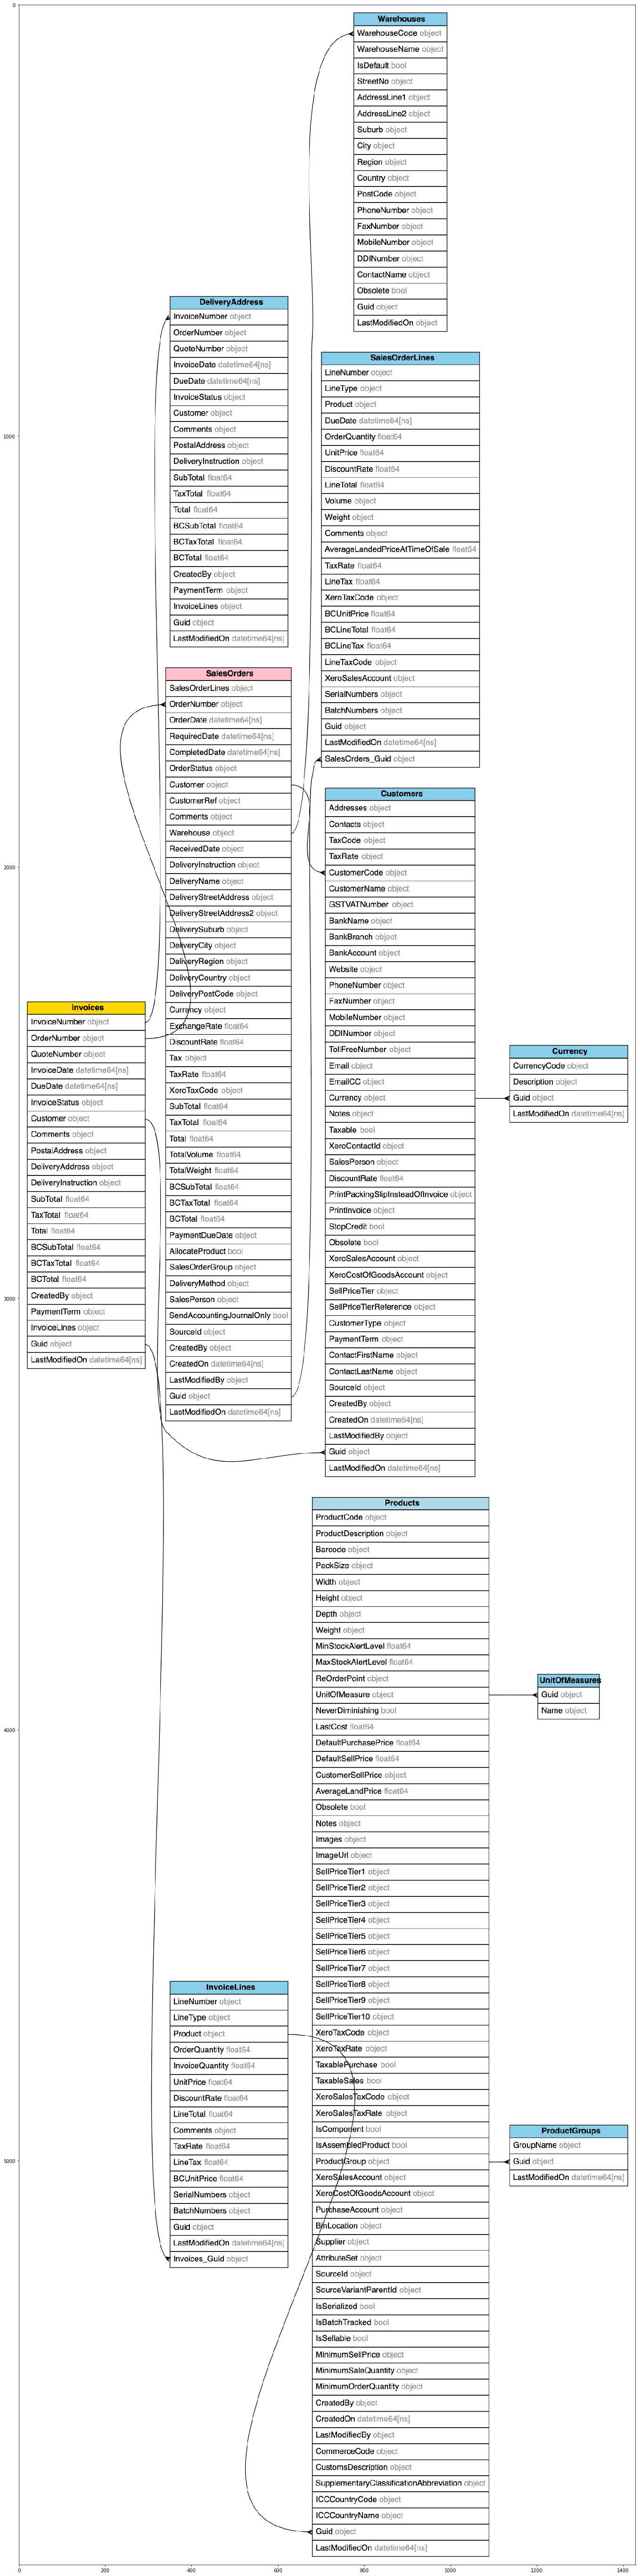

In [69]:
fig = plt.gcf()
fig.set_size_inches(180, 100)
I = mpimg.imread('./graph.png')
plt.imshow(I)